In [1]:
import importlib
import sys
import os
import nltk
import pandas as pd
import networkx as nx

# Add the 'src' directory to the system path
sys.path.append(os.path.abspath('../src'))
src_path = os.path.abspath('../src')

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import classes from the modules using their correct filenames
from DataLoaderClass import DataLoader

In [3]:
# Initialize paths
BIB_FILE_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/index.bib'
PDF_FOLDER_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/files'

In [4]:
# Step 1: Data Loading and Processing
loader = DataLoader(BIB_FILE_PATH, PDF_FOLDER_PATH)
processed_data = loader.load_and_process()


Matching process completed.
Total references matched: 31 out of 31
Unmatched References: 0

Unmatched PDF Folders: 0


In [5]:
# -------------------------------------------------------------- #
# -- EDA M2 :: Authors ----------------------------------------- #
# -------------------------------------------------------------- #
from eda.m2_authors_analysis import Processor
from eda.m2_authors_analysis import Visualizer
from eda.m2_authors_analysis import Reporter
from eda.m2_authors_analysis import AuthorTermAnalyzer
# -------------------------------------------------------------- #

# Data
data = processed_data

# Process data
processor = Processor(data)
visualizer = Visualizer()
reporter = Reporter()

In [6]:
##########################################################
### Function 1 => Authors: Most Frequent Authors #########
##########################################################

### **Indicator: Top Authors**

The Top Authors indicator identifies the most prolific contributors in the dataset by calculating the total number of documents each author has contributed to, including individual and group contributions. This analysis highlights key contributors, with the results displayed in a bar chart for a visual ranking and a table summarizing their document counts. The data is also saved as a CSV file for further analysis.


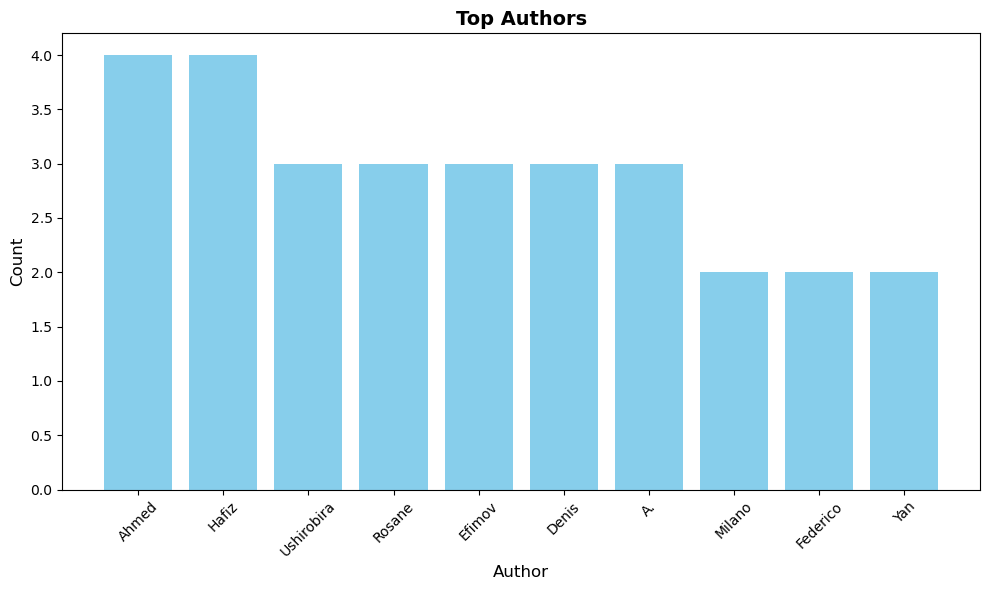

Saved to ../output/m2_authors/top_authors_report.csv
top_authors
       Author  Count
0       Ahmed      4
1       Hafiz      4
2  Ushirobira      3
3      Rosane      3
4      Efimov      3
5       Denis      3
6          A.      3
7      Milano      2
8    Federico      2
9         Yan      2


In [7]:
# Function 1: Authors: Most Frequent Authors
top_authors = processor.get_top_authors(n=10)

Visualizer.plot_bar_chart(top_authors, "Top Authors", "top_authors")

Reporter.save_to_csv(top_authors, "top_authors_report")

print('top_authors')
print(top_authors)

In [8]:
##########################################################
### Function 2 => Author Trends                  #########
##########################################################

### **Indicator: Author Trends**

The Author Trends indicator tracks the yearly publishing activity of top contributors, providing insights into their productivity over time. Each author's yearly document counts are visualized in a line chart to highlight growth, decline, or consistency in their contributions, with a detailed table and CSV file summarizing the trends for further exploration.


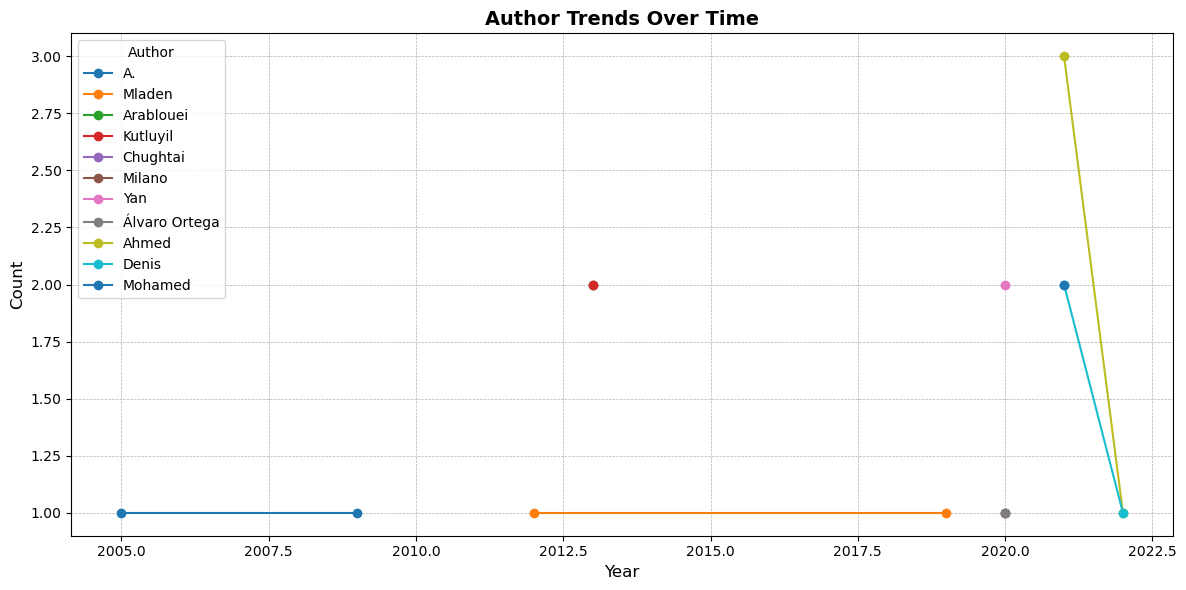

Saved to ../output/m2_authors/author_trends_report.csv


In [9]:
# Function 2: Author Trends
top_authors = processor.get_top_authors(n=25)
authors_to_track = top_authors["Author"].tolist()
author_trends = processor.get_author_trends(authors_to_track)
Visualizer.plot_line_chart(author_trends, "Author Trends Over Time", "author_trends")
Reporter.save_to_csv(author_trends, "author_trends_report")

In [10]:
#########################################################
### Function 3 => Authors: Most Collaborative Authors ###
#########################################################

### **Indicator: Most Collaborative Authors**

This metric identifies authors who frequently collaborate with others, emphasizing key contributors and network hubs in the dataset. Collaboration is measured by the number of unique co-authors each author has worked with, providing insights into their connectedness and influence within the research community.

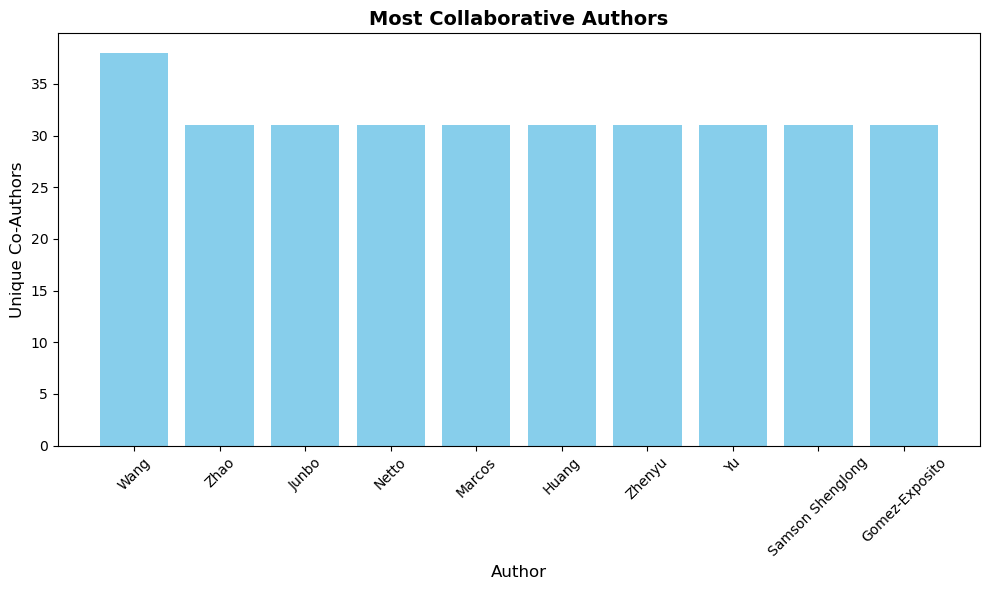

Saved to ../output/m2_authors/most_collaborative_authors_report.csv


,Author,Unique Co-Authors
0,Wang,38
1,Zhao,31
2,Junbo,31
3,Netto,31
4,Marcos,31
5,Huang,31
6,Zhenyu,31
7,Yu,31
8,Samson Shenglong,31
9,Gomez-Exposito,31


In [11]:
### Function 3 => Most Collaborative Authors (Table & Barplot)

collaborative_authors = processor.get_most_collaborative_authors(n=10)

Visualizer.plot_bar_chart(
    collaborative_authors,
    title="Most Collaborative Authors",
    filename="most_collaborative_authors",
    x_col="Author",  # Column for x-axis
    y_col="Unique Co-Authors"  # Corrected column for y-axis
)

# Step 4: Save the table
Reporter.save_to_csv(collaborative_authors, "most_collaborative_authors_report")

# Step 5: Display the table in the notebook
collaborative_authors

In [12]:
###########################################################
### Function 4 => Authors: Author Collaboration Network ###
###########################################################

### **Indicator: Author Collaboration Network**

This indicator visualizes the relationships between authors based on co-authorship. The graph shows how frequently authors collaborate, highlighting key connections and influential contributors within the dataset.

Saved to ../output/m2_authors/author_clusters.csv
Clusters saved to ../output/m2_authors/author_clusters.csv


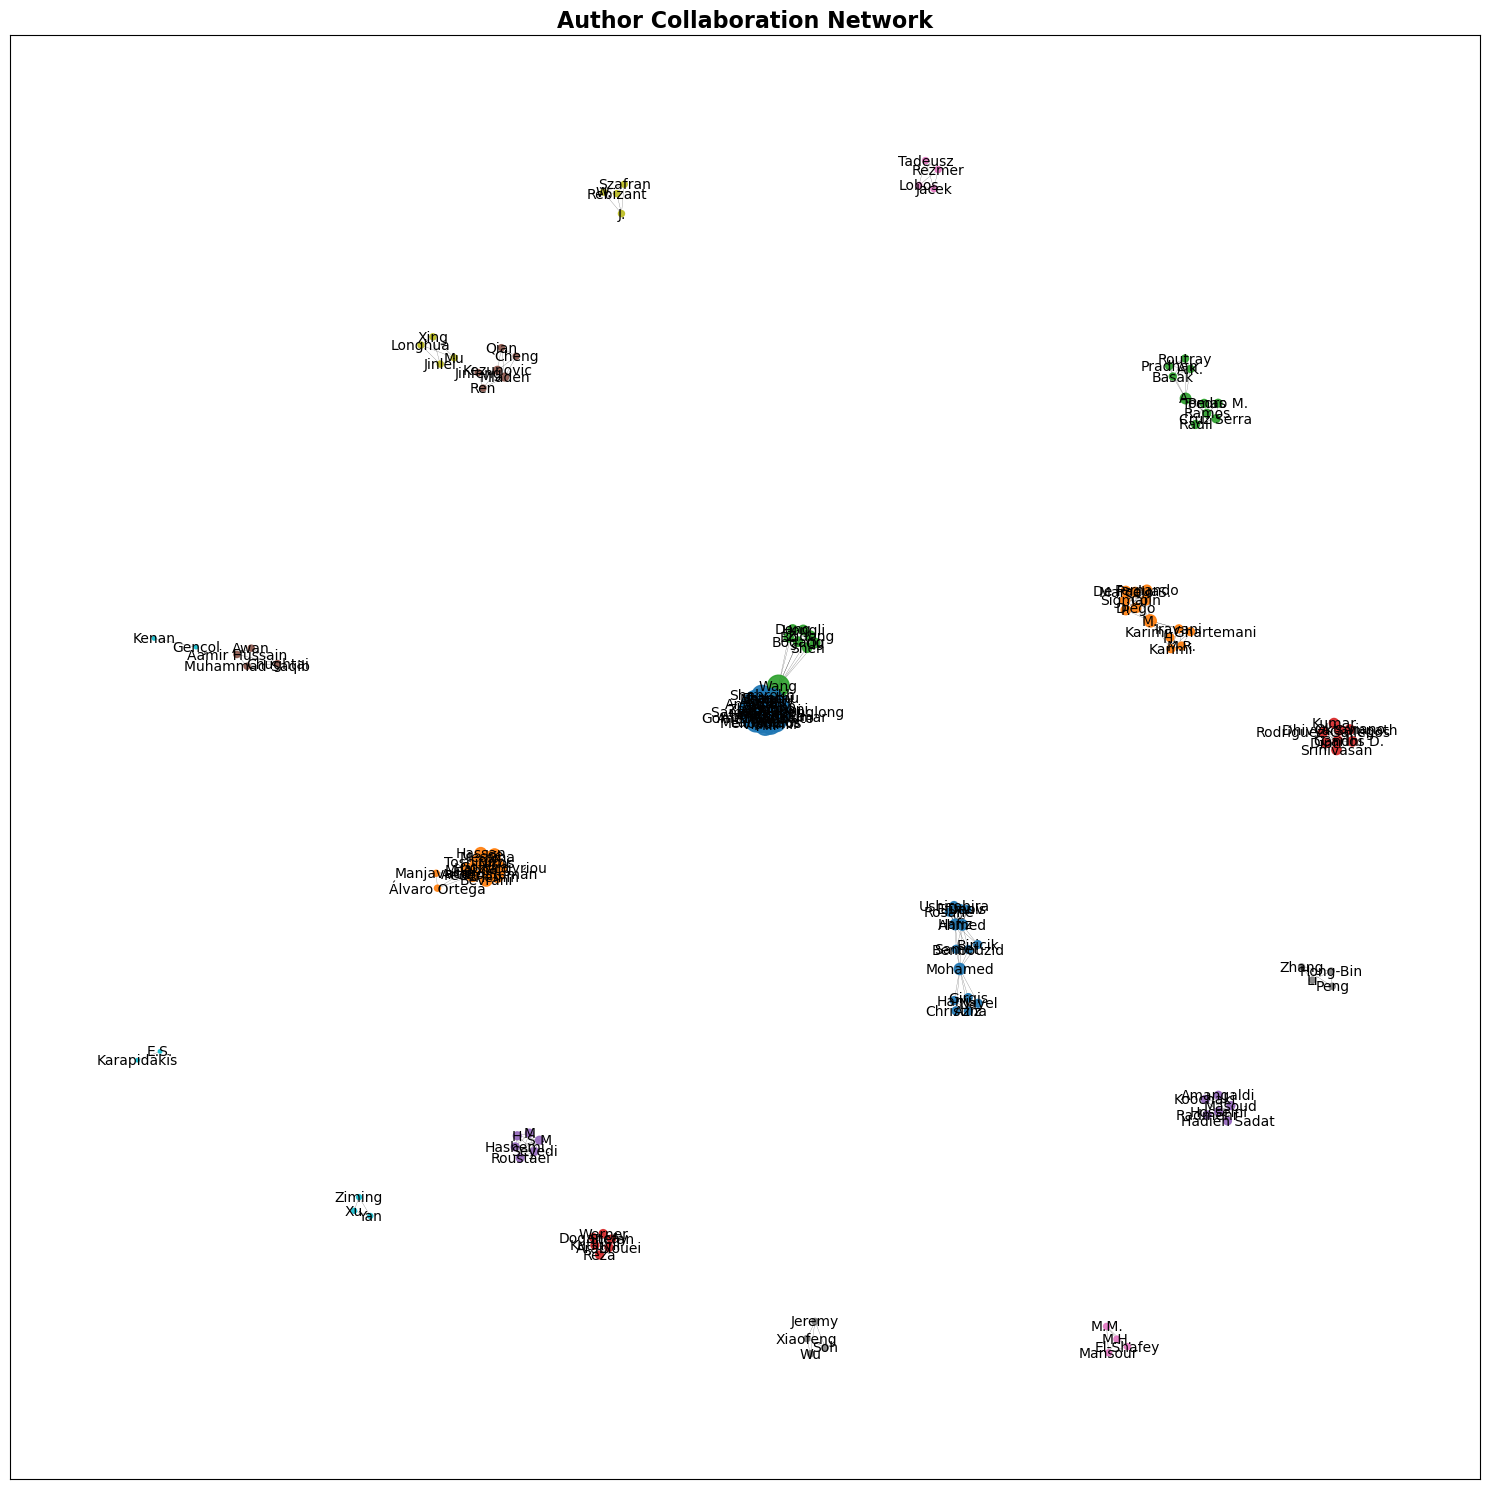

Saved to ../output/m2_authors/author_collaboration_network.csv
Saved to ../output/m2_authors/author_clusters.csv
Clusters saved to ../output/m2_authors/author_clusters.csv


,Cluster ID,Authors
0,Cluster 1,"A. P. Sakis, Abhinav Kumar, Abur, Akhlaghi, Al..."
1,Cluster 2,"Ahmed, Aziz, Benbouzid, Biricik, Christina, De..."
2,Cluster 3,"Arturo Román, Bevrani, Federico, Golpîra, Hass..."
3,Cluster 4,"Coln, De Padua, Diego, Fernando, H., Iravani, ..."
4,Cluster 5,"A., A.K., Basak, Cruz Serra, Pedro M., Pradhan..."
5,Cluster 6,"Bo, Bogang, Dong, Hongli, Qu, Shen, Wang, Zidong"
6,Cluster 7,"Carlos D., Dhivya Sampath, Dipti, Gandhi, Kuma..."
7,Cluster 8,"Arablouei, Dogancay, Kutluyil, Reza, Stefan, W..."
8,Cluster 9,"Amangaldi, Hadieh Sadat, Hosseini, Koochaki, M..."
9,Cluster 10,"H, Hashemi, M, Roustaei, S M, Seyedi"


In [13]:
# Step 1: Generate the collaboration network data
collaboration_data = processor.create_collaboration_network()

# Step 2: Extract and display clusters
clusters_table = processor.extract_clusters(collaboration_data)

# Step 3: Plot the network
Visualizer.plot_author_collaboration_network(collaboration_data)

# Step 4: Save the collaboration table
Reporter.save_to_csv(collaboration_data, "author_collaboration_network")

# Extract and display clusters
clusters_table =processor.extract_clusters(collaboration_data)
clusters_table


In [14]:
###########################################################
### Function 5 => Authors: Productivity Distribution    ###
###########################################################

This indicator provides insights into how productivity is distributed among authors. It helps identify disparities, such as whether contributions are dominated by a few prolific authors or evenly distributed among many. The visualization includes a histogram and descriptive statistics to summarize the distribution.

#### **How to Interpret**
- **Histogram**: Shows the frequency distribution of document counts per author. A right-skewed distribution indicates a small group of prolific authors.
- **Descriptive Statistics**: Includes measures like mean, median, and standard deviation of document counts.


Saved to ../output/m2_authors/productivity_distribution_stats.csv


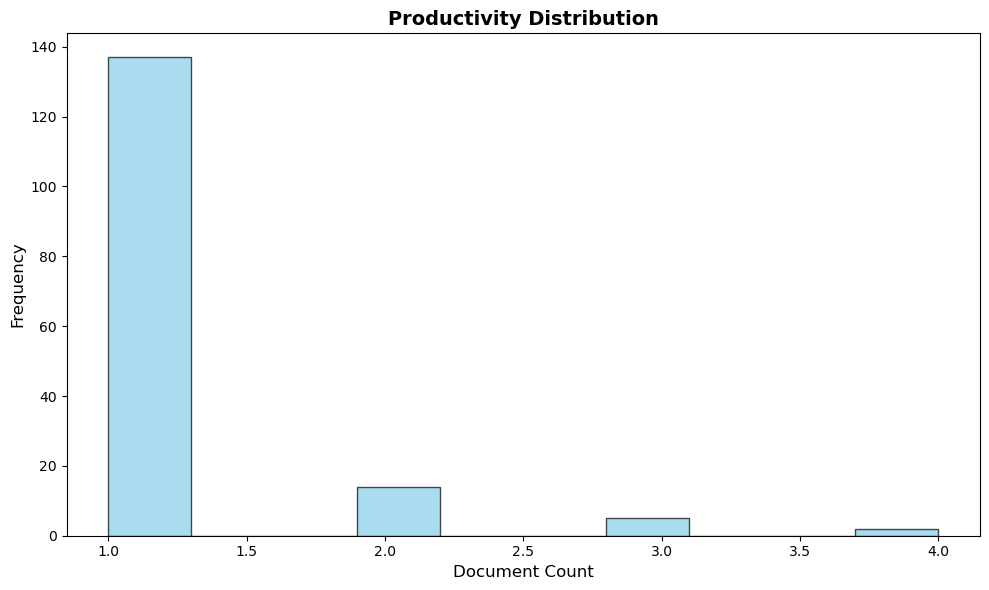

Saved to ../output/m2_authors/productivity_distribution_report.csv
Descriptive Statistics:
count    158.000000
mean       1.189873
std        0.543073
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Document Count, dtype: float64


,Author,Document Count
0,Milano,2
1,Federico,2
2,Manjavacas,1
3,Álvaro Ortega,1
4,Chughtai,1
...,...,...
153,W.,1
154,Xing,1
155,Jinlei,1
156,Mu,1


In [15]:
# Step 1: Get productivity distribution data
productivity_df = processor.get_productivity_distribution()

# Step 2: Save the descriptive statistics
descriptive_stats = productivity_df["Document Count"].describe()
Reporter.save_to_csv(descriptive_stats.to_frame(), "productivity_distribution_stats")

# Step 3: Visualize the histogram
Visualizer.plot_histogram(
    df=productivity_df,
    column="Document Count",
    title="Productivity Distribution",
    filename="productivity_distribution"
)

# Step 4: Save the table
Reporter.save_to_csv(productivity_df, "productivity_distribution_report")

# Display the descriptive statistics in the notebook
print("Descriptive Statistics:")
print(descriptive_stats)

# Display the DataFrame in the notebook
productivity_df


In [16]:
########################################################
### Function 6 => Authors: Longest-Standing Authors  ###
########################################################

### **Indicator: Longest-Standing Authors**

This indicator identifies the authors with the longest publication spans based on the dataset. It calculates the time difference between their first and last recorded publications, highlighting contributors with sustained activity over time.

#### **How to Interpret**
- **Bar Chart**: Displays the top authors ranked by their active publication spans.
- **Table**: Lists authors alongside their first publication year, last publication year, and active span (years).


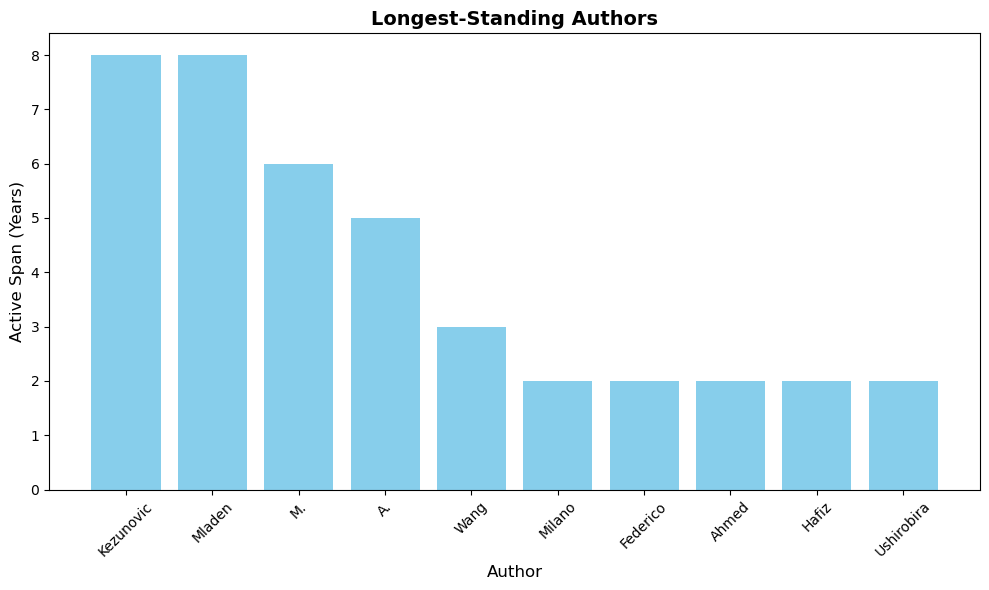

Saved to ../output/m2_authors/longest_standing_authors_report.csv


,Author,First Publication,Last Publication,Active Span (Years)
0,Kezunovic,2012,2019,8
1,Mladen,2012,2019,8
2,M.,2004,2009,6
3,A.,2005,2009,5
4,Wang,2021,2023,3
5,Milano,2020,2021,2
6,Federico,2020,2021,2
7,Ahmed,2021,2022,2
8,Hafiz,2021,2022,2
9,Ushirobira,2021,2022,2


In [17]:
# Step 1: Get the longest-standing authors
longest_standing_authors = processor.get_longest_standing_authors(n=10)

# Step 2: Visualize the longest-standing authors
Visualizer.plot_bar_chart(
    longest_standing_authors,
    title="Longest-Standing Authors",
    filename="longest_standing_authors",
    x_col="Author",  # Column for x-axis
    y_col="Active Span (Years)"  # Column for y-axis
)

# Step 4: Save the table
Reporter.save_to_csv(longest_standing_authors, "longest_standing_authors_report")

# Display the table in the notebook
longest_standing_authors

In [18]:
#####################################################################
### Function 7 => Authors: How Each Author Relates to Each Term   ###
#####################################################################

### **Indicator: Author-Term Relationships**

This indicator provides insights into how each author is related to specific terms. For each author, the relationships between terms (co-occurrences) are identified, highlighting their thematic focus. This analysis can uncover which terms are commonly used together by an author and how this differs from other authors.

#### **How to Interpret**
- **Table**: Displays the terms related to each author and the co-occurrences of these terms.
- **Insights**: For example, Author A may relate "frequency" to "power" and "control," while Author B relates "frequency" to "voltage" and "estimation."


In [19]:
# Clear all variables
#%reset -f

# Free up memory
import gc
gc.collect()

22725

In [20]:
# Step 1: Get the author-term relationships

analyzer = AuthorTermAnalyzer(processed_data=processed_data)

#author_term_relationships = processor.get_author_term_relationships()

# Step 2: Save the table
#Reporter.save_to_csv(author_term_relationships, "author_term_relationships")

# Step 3: Display the table in the notebook
#author_term_relationships

In [21]:
# Run the analysis
# Test with a small subset of data
subset_data = processed_data[:5]  # Replace with your actual processed_data
analyzer = AuthorTermAnalyzer(subset_data, temp_dir="./temp")

# Run the analysis
final_df = analyzer.analyze(batch_size=2)  # Small batch size for testing

# Save the final result
final_df.to_csv("author_term_relationships.csv", index=False)

print("Analysis complete. Results saved to 'author_term_relationships.csv'.")

Processing Entries: 3it [18:07, 362.61s/it]


Analysis complete. Results saved to 'author_term_relationships.csv'.
